In [19]:
import numpy as np
import os

# Specify the directory containing the .npz files
directory = '/Users/apaula/Downloads/data_20240301_082933912_DJI_0261'

# Dictionary to hold the data from all .npz files
npz_files_data = {}

# Loop through all files in the directory
for file in os.listdir(directory):
    if file.endswith('.npz'):
        file_path = os.path.join(directory, file)
        # Load the NPZ file
        data = np.load(file_path)
        # Store the data using the file name as the key
        npz_files_data[file] = {key: data[key] for key in data.files}

# Now you can access the loaded data from the npz_files_data dictionary


In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

def plot_pose_on_frames(input_folder, output_folder, npz_files_data):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    pose_pairs = [(0, 2), (2, 4), (4, 5), (5, 6), (6, 7), (7, 8), (2, 3), (2, 1)]
    files = sorted(os.listdir(input_folder))

    for filename in files:
        if filename.endswith('.jpg'):
            frame_number = int(filename.split('_')[1].split('.')[0])  # Assumes format 'frame_XXXX.jpg'
            frame_data = {}
            
            # Extract keypoints data for the current frame from all npz files
            for file, data in npz_files_data.items():
                if 'frame' in data:
                    frame_indices = np.where(data['frame'] == frame_number)[0]
                    if frame_indices.size > 0:
                        frame_data[file] = {}
                        for key in data:
                            if len(data[key]) > frame_indices.max() and np.all(np.isfinite(data[key][frame_indices])):  # Check for finite values
                                frame_data[file][key] = data[key][frame_indices]
                            else:
                                print(f"Skipping non-finite data for key {key} in frame {frame_number}")
            
            img_path = os.path.join(input_folder, filename)
            img = mpimg.imread(img_path)
            figsize = 10, 10 * (img.shape[0] / img.shape[1])
            dpi = img.shape[1] / figsize[0]

            fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
            ax.imshow(img)
            ax.axis('off')

            all_x_values = []
            all_y_values = []
            if frame_data:
                for i in range(9):  # Assumes keypoints 0-8
                    for file, data in frame_data.items():
                        x_key = f'poseX{i}'
                        y_key = f'poseY{i}'
                        if x_key in data and y_key in data:
                            x_values = data[x_key].flatten()  # Flatten in case data is multi-dimensional
                            y_values = data[y_key].flatten()
                            ax.scatter(x_values, y_values, color='white', s=9)
                            all_x_values.append(x_values)
                            all_y_values.append(y_values)

                for start, end in pose_pairs:
                    if len(all_x_values) > start and len(all_x_values) > end:
                        x_values = [all_x_values[start], all_x_values[end]]
                        y_values = [all_y_values[start], all_y_values[end]]
                        ax.plot(x_values, y_values, color='white', linewidth=0.5)
            else:
                print(f"No valid data found for frame {frame_number}")

            output_path = os.path.join(output_folder, f'modified_{filename}')
            plt.savefig(output_path, dpi=dpi, bbox_inches='tight', pad_inches=0)
            plt.close(fig)

# Example usage:
input_folder = '/Volumes/timelapses/DJI_0261_fishframes'
output_folder = '/Volumes/timelapses/DJI_0261_sharkfishframes'
npz_files_data = {}  # Populate this dictionary by loading your npz files as previously described
# Loop through all files in the directory
for file in os.listdir(directory):
    if file.endswith('.npz'):
        file_path = os.path.join(directory, file)
        # Load the NPZ file
        data = np.load(file_path)
        # Store the data using the file name as the key
        npz_files_data[file] = {key: data[key] for key in data.files}
plot_pose_on_frames(input_folder, output_folder, npz_files_data)


No valid data found for frame 0
No valid data found for frame 1


UnidentifiedImageError: cannot identify image file '/Volumes/timelapses/DJI_0261_fishframes/frame_0002.jpg'

In [13]:
# Dictionary to hold data for frame 1794 from all files
frame_1794_data = {}

# Loop through each file's data in the npz_files_data dictionary
for filename, data in npz_files_data.items():
    # Check if 'frame' key exists in the data dictionary
    if 'frame' in data:
        # Find the indices where frame number is 1794
        frame_indices = np.where(data['frame'] == 1794)[0]
        # Check if there are any entries for frame 1794
        if frame_indices.size > 0:
            # Retrieve and store all data for these indices, ensuring indices do not exceed array length
            frame_1794_data[filename] = {}
            for key in data:
                if len(data[key]) > frame_indices.max():  # Ensure the maximum index is within the array length
                    frame_1794_data[filename][key] = data[key][frame_indices]
                else:
                    frame_1794_data[filename][key] = 'Index out of bounds'

# frame_1794_data now contains all entries for frame 1794 from each npz file that includes this frame


In [28]:
# Print all frame values from frame_1794_data
for filename, data in frame_1794_data.items():
    print(f"Filename: {filename}")
    if 'frame' in data:
        print("Frame Values:", data['frame'])
    else:
        print("No frame data available for this file.")
    print()  # Print a newline for better separation


Filename: 20240301_082933912_DJI_0261_fish1.npz
Frame Values: [1794.]

Filename: 20240301_082933912_DJI_0261_fish0.npz
Frame Values: [1794.]

Filename: 20240301_082933912_DJI_0261_fish2.npz
Frame Values: [1794.]

Filename: 20240301_082933912_DJI_0261_fish3.npz
Frame Values: [1794.]

Filename: 20240301_082933912_DJI_0261_fish6.npz
Frame Values: [1794.]

Filename: 20240301_082933912_DJI_0261_fish4.npz
Frame Values: [1794.]

Filename: 20240301_082933912_DJI_0261_fish5.npz
Frame Values: [1794.]



In [29]:
# Print pose values (poseX and poseY) from frame_1794_data
for filename, data in frame_1794_data.items():
    print(f"Filename: {filename}")
    pose_data = {}  # Store pose data for current file
    for key in data:
        if key.startswith('poseX') or key.startswith('poseY'):
            if isinstance(data[key], str) and data[key] == 'Index out of bounds':
                pose_data[key] = 'Index out of bounds'
            else:
                pose_data[key] = data[key]
    
    if pose_data:
        print("Pose Data:")
        for pose_key, values in pose_data.items():
            print(f"{pose_key}: {values}")
    else:
        print("No pose data available or indices were out of bounds.")
    print()  # Print a newline for better separation


Filename: 20240301_082933912_DJI_0261_fish1.npz
Pose Data:
poseY8: [inf]
poseY5: [inf]
poseY4: [inf]
poseY2: [inf]
poseY16: [inf]
poseY6: [inf]
poseY12: [inf]
poseY11: [inf]
poseY15: [inf]
poseX12: [inf]
poseY10: [inf]
poseY0: [inf]
poseX6: [inf]
poseX3: [inf]
poseX2: [inf]
poseX15: [inf]
poseX11: [inf]
poseX10: [inf]
poseX4: [inf]
poseX0: [inf]
poseX13: [inf]
poseY13: [inf]
poseX8: [inf]
poseX7: [inf]
poseX16: [inf]
poseY9: [inf]
poseY14: [inf]
poseY1: [inf]
poseX1: [inf]
poseX14: [inf]
poseY7: [inf]
poseX9: [inf]
poseX5: [inf]
poseY3: [inf]

Filename: 20240301_082933912_DJI_0261_fish0.npz
Pose Data:
poseY8: [886.]
poseY7: [812.]
poseY6: [756.]
poseY4: [633.]
poseY3: [578.]
poseY16: [inf]
poseY14: [inf]
poseY11: [inf]
poseX8: [477.]
poseX7: [495.]
poseY12: [inf]
poseX6: [510.]
poseY10: [inf]
poseX5: [549.]
poseX1: [602.]
poseX10: [inf]
poseX16: [inf]
poseY9: [inf]
poseX15: [inf]
poseX13: [inf]
poseX4: [599.]
poseY5: [700.]
poseY15: [inf]
poseX11: [inf]
poseX3: [761.]
poseY13: [inf]
po

Plotting for: 20240301_082933912_DJI_0261_fish1.npz


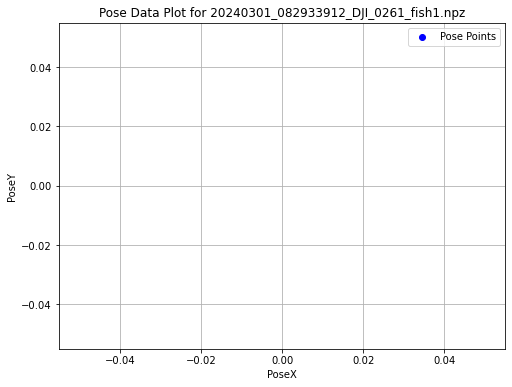

Plotting for: 20240301_082933912_DJI_0261_fish0.npz


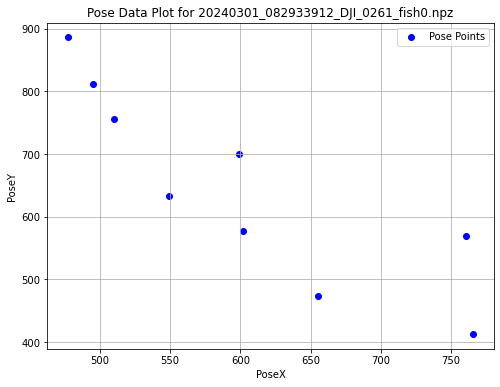

Plotting for: 20240301_082933912_DJI_0261_fish2.npz


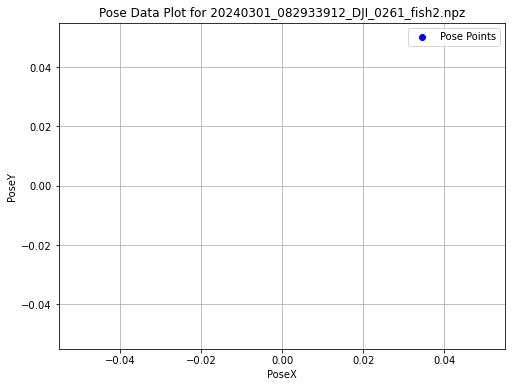

Plotting for: 20240301_082933912_DJI_0261_fish3.npz


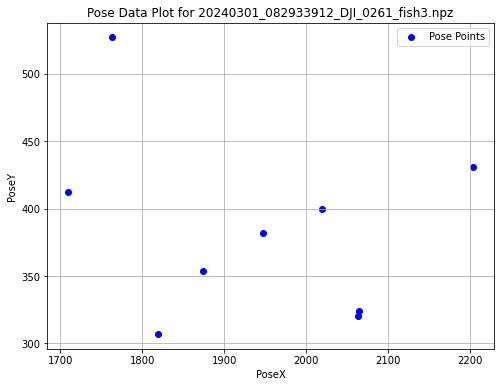

Plotting for: 20240301_082933912_DJI_0261_fish6.npz


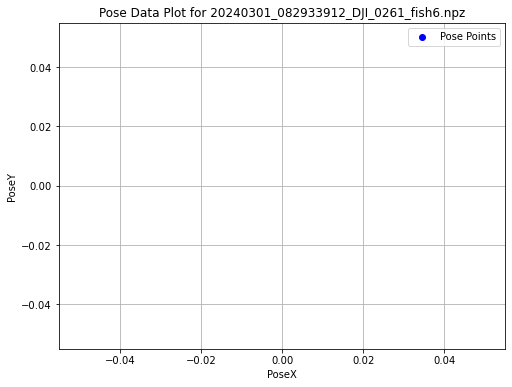

Plotting for: 20240301_082933912_DJI_0261_fish4.npz


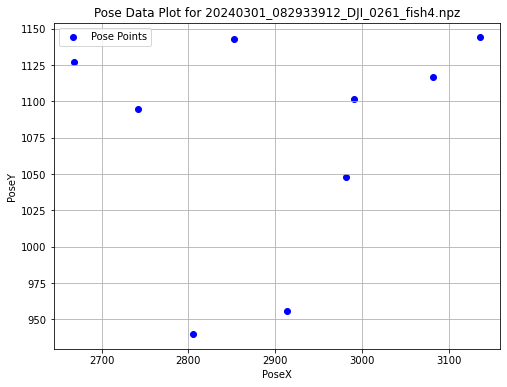

Plotting for: 20240301_082933912_DJI_0261_fish5.npz


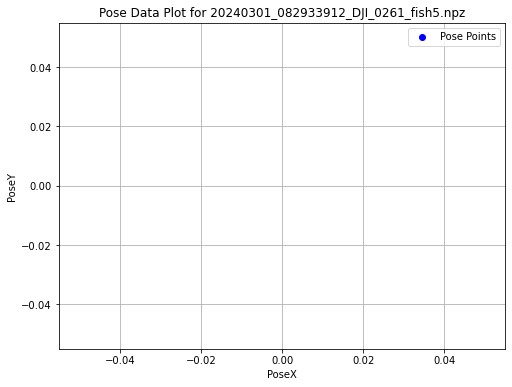

In [30]:
import matplotlib.pyplot as plt

# Function to plot pose data
def plot_pose_data(pose_data, filename):
    x_values = []
    y_values = []
    
    # Collect all valid poseX and poseY values
    for key in pose_data:
        if key.startswith('poseX') and isinstance(pose_data[key], np.ndarray) and not np.isinf(pose_data[key]).all():
            x_values.append(pose_data[key][0])
        elif key.startswith('poseY') and isinstance(pose_data[key], np.ndarray) and not np.isinf(pose_data[key]).all():
            y_values.append(pose_data[key][0])
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, color='blue', label='Pose Points')
    plt.title(f'Pose Data Plot for {filename}')
    plt.xlabel('PoseX')
    plt.ylabel('PoseY')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot pose data for each file
for filename, data in frame_1794_data.items():
    print(f"Plotting for: {filename}")
    plot_pose_data(data, filename)


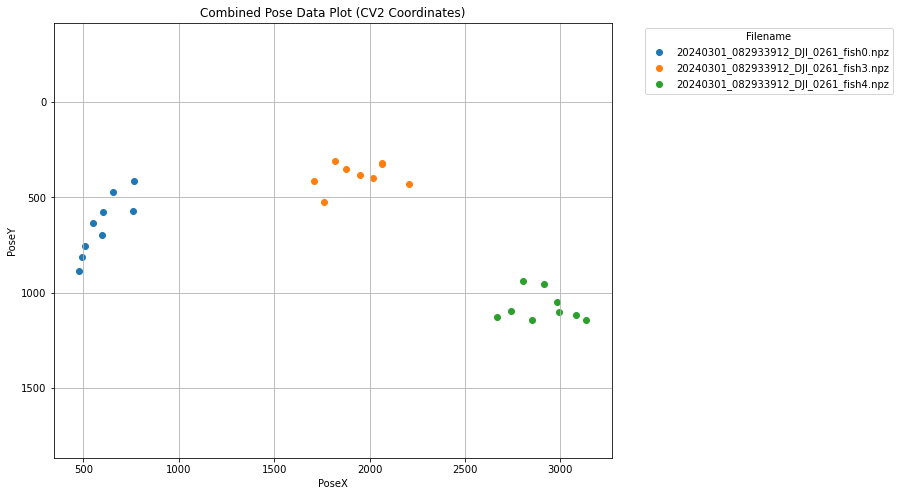

In [14]:
import matplotlib.pyplot as plt

# Prepare a color cycle, using matplotlib's default prop cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Function to collect all pose data points
def collect_pose_data(frame_1794_data):
    plot_data = {}
    for filename, data in frame_1794_data.items():
        x_values = []
        y_values = []
        
        # Collect all valid poseX and poseY values
        for key in data:
            if key.startswith('poseX') and isinstance(data[key], np.ndarray) and not np.isinf(data[key]).all():
                x_values.extend(data[key])
            elif key.startswith('poseY') and isinstance(data[key], np.ndarray) and not np.isinf(data[key]).all():
                y_values.extend(data[key])
        
        if x_values and y_values:  # Only add if there are valid points
            plot_data[filename] = (x_values, y_values)
    return plot_data

# Collect all data points
collected_data = collect_pose_data(frame_1794_data)

# Plot all data on the same axes
plt.figure(figsize=(10, 8))
for idx, (filename, (x_values, y_values)) in enumerate(collected_data.items()):
    plt.scatter(x_values, y_values, color=color_cycle[idx % len(color_cycle)], label=filename)

plt.title('Combined Pose Data Plot (CV2 Coordinates)')
plt.xlabel('PoseX')
plt.ylabel('PoseY')
plt.gca().invert_yaxis()  # Invert the Y-axis to match CV2 coordinate system
plt.axis('equal')  # Set equal scaling by changing aspect ratio of the plot
plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

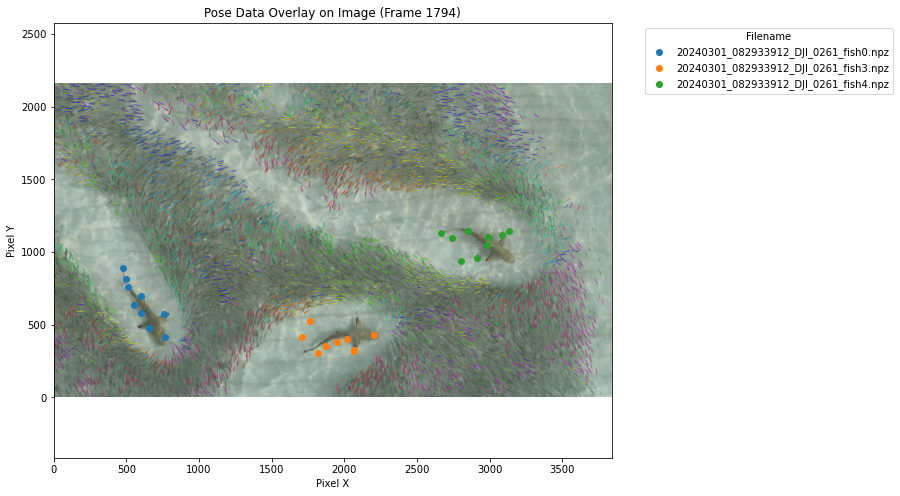

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image file
image_path = '/Users/apaula/Downloads/frame_1794.jpg'

# Load the image
img = mpimg.imread(image_path)

# Prepare a color cycle, using matplotlib's default prop cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Function to collect all pose data points
def collect_pose_data(frame_1794_data):
    plot_data = {}
    for filename, data in frame_1794_data.items():
        x_values = []
        y_values = []
        
        # Collect all valid poseX and poseY values
        for key in data:
            if key.startswith('poseX') and isinstance(data[key], np.ndarray) and not np.isinf(data[key]).all():
                x_values.extend(data[key])
            elif key.startswith('poseY') and isinstance(data[key], np.ndarray) and not np.isinf(data[key]).all():
                y_values.extend(data[key])
        
        if x_values and y_values:  # Only add if there are valid points
            plot_data[filename] = (x_values, y_values)
    return plot_data

# Collect all data points
collected_data = collect_pose_data(frame_1794_data)

# Plot all data on the same axes with the image
plt.figure(figsize=(10, 8))
plt.imshow(img)  # Display the image as the background
for idx, (filename, (x_values, y_values)) in enumerate(collected_data.items()):
    plt.scatter(x_values, y_values, color=color_cycle[idx % len(color_cycle)], label=filename)

plt.title('Pose Data Overlay on Image (Frame 1794)')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.gca().invert_yaxis()  # Ensure the y-axis starts from the top
plt.axis('equal')  # Set equal scaling by changing aspect ratio of the plot
plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)  # Turn off the grid as it's not typically needed on images
plt.show()

0


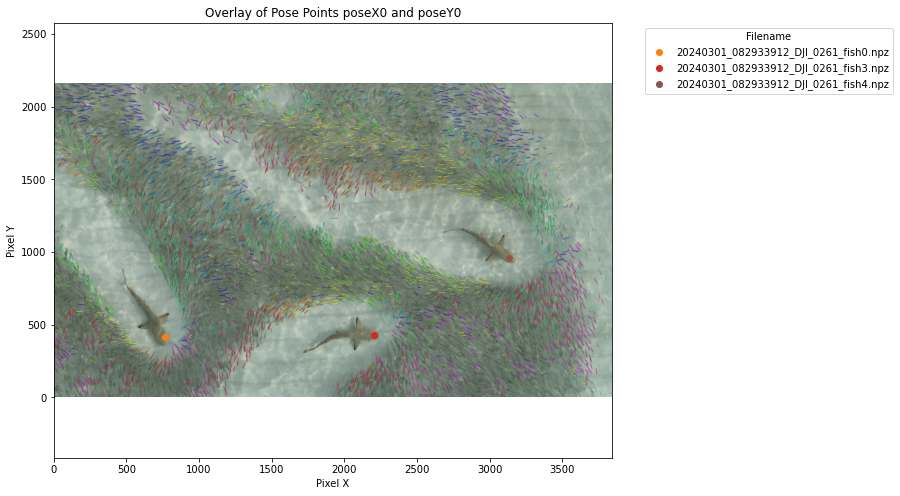

1


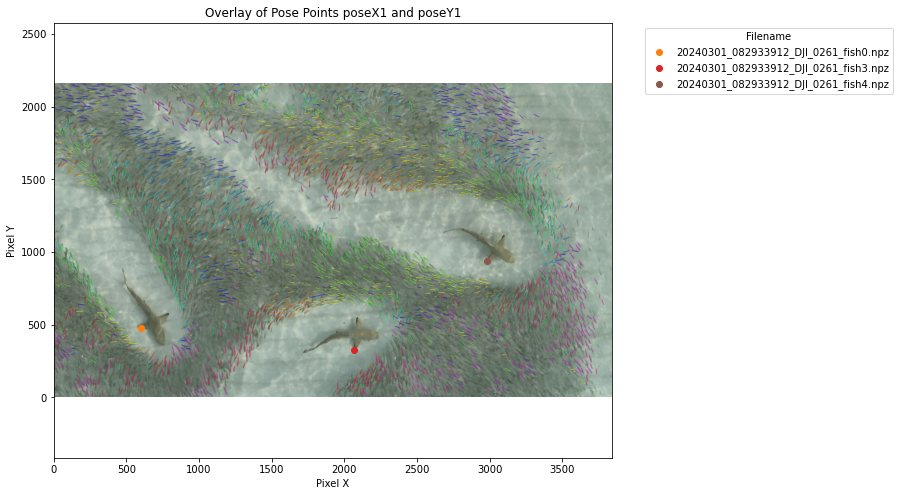

2


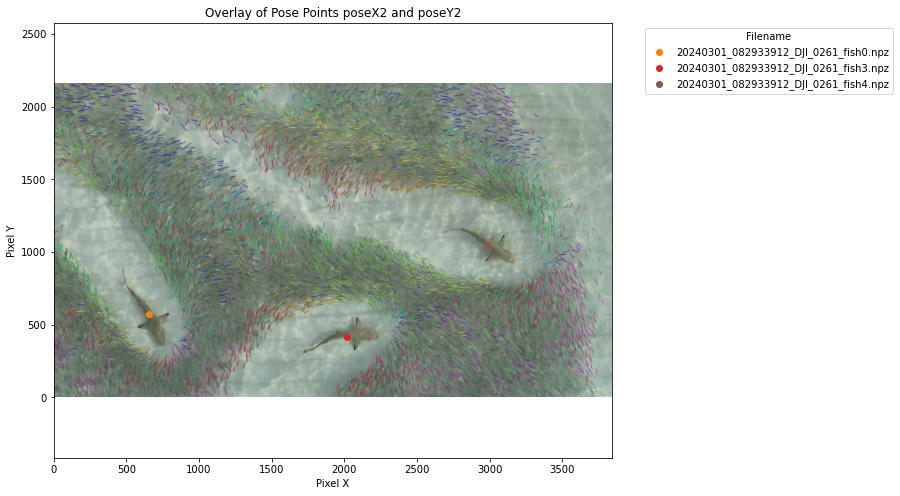

3


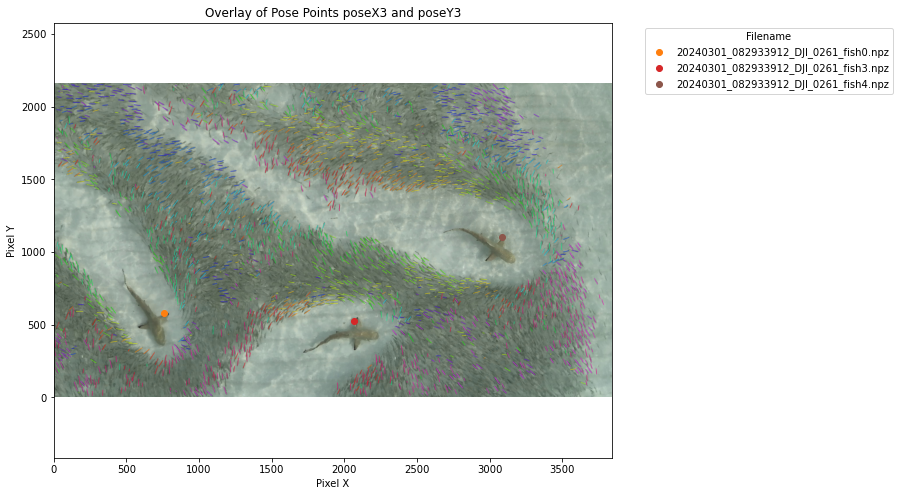

4


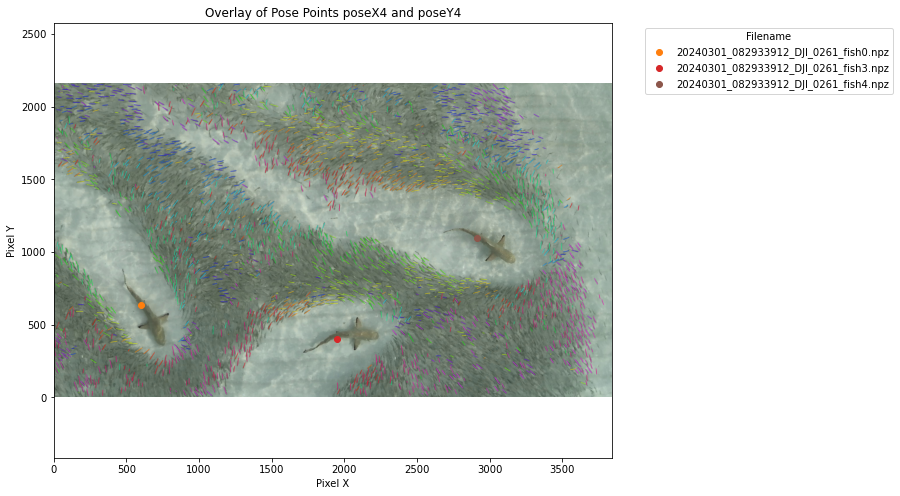

5


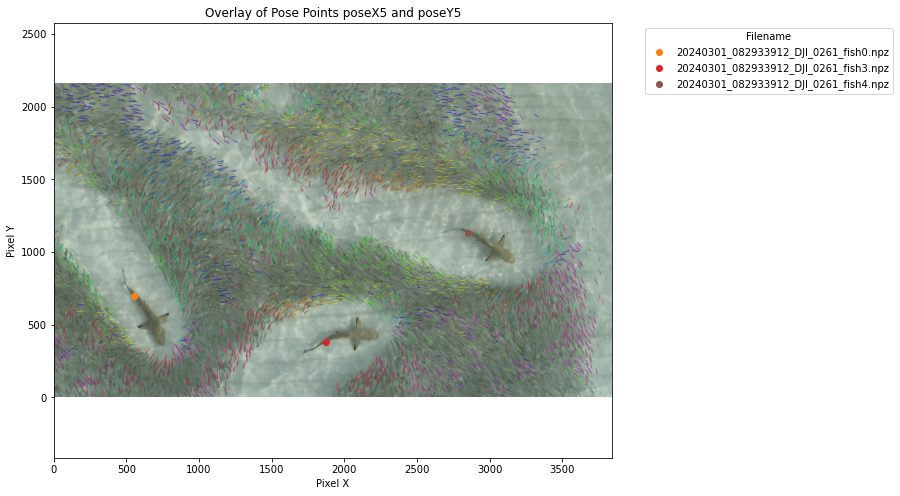

6


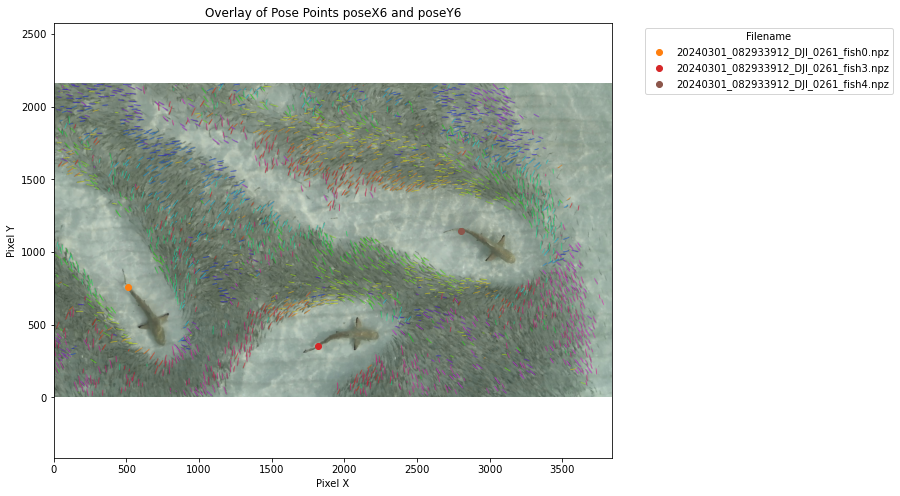

7


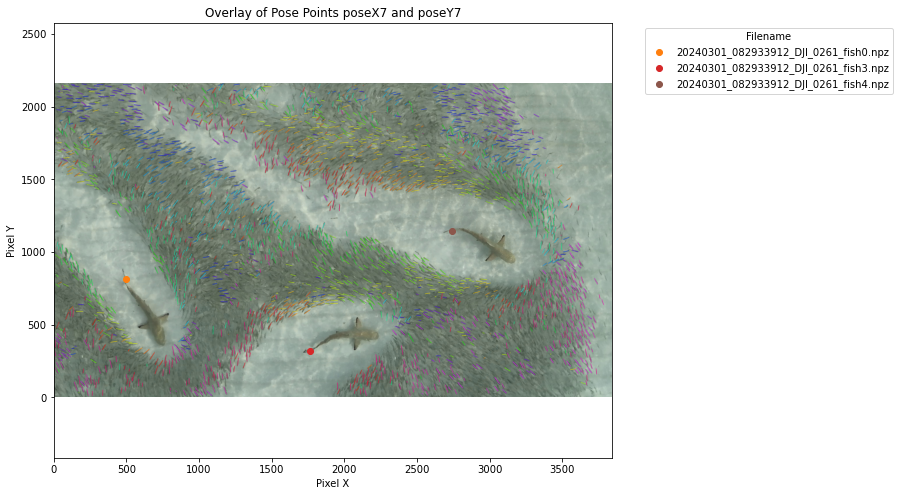

8


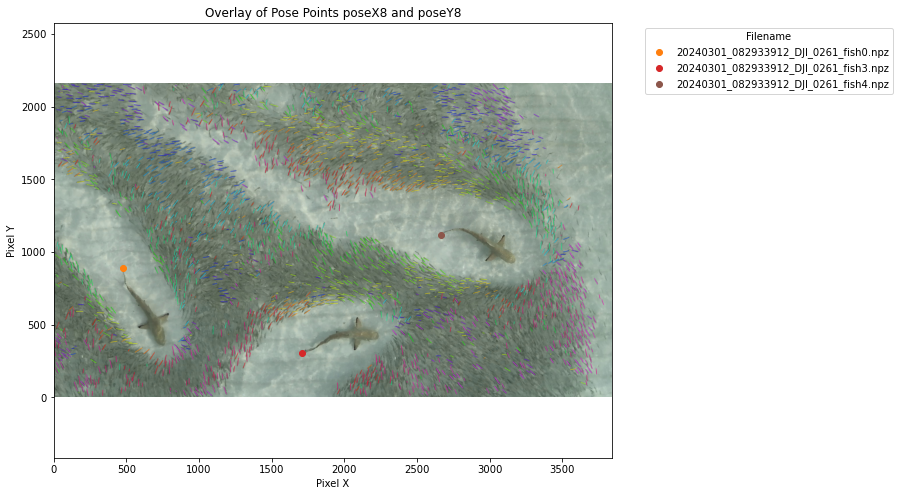

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


9


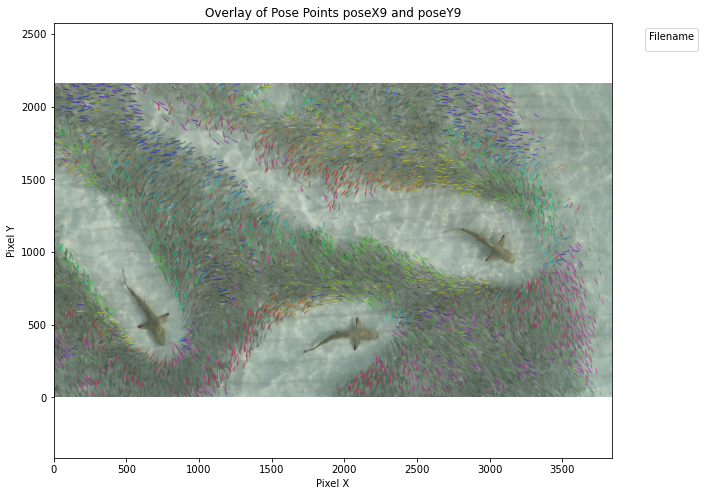

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10


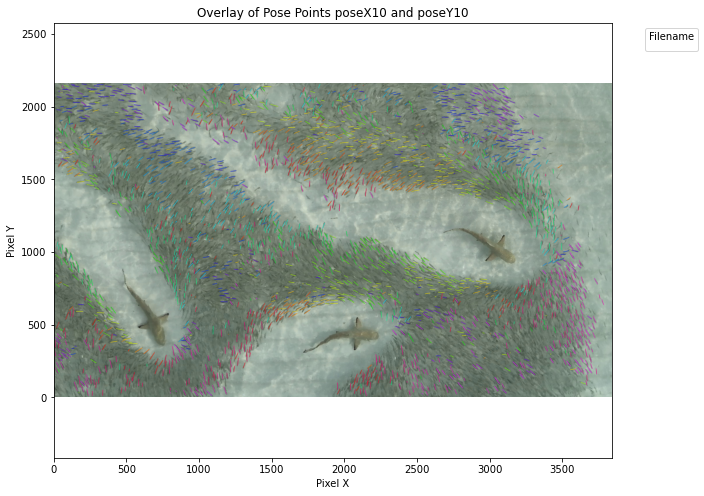

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


11


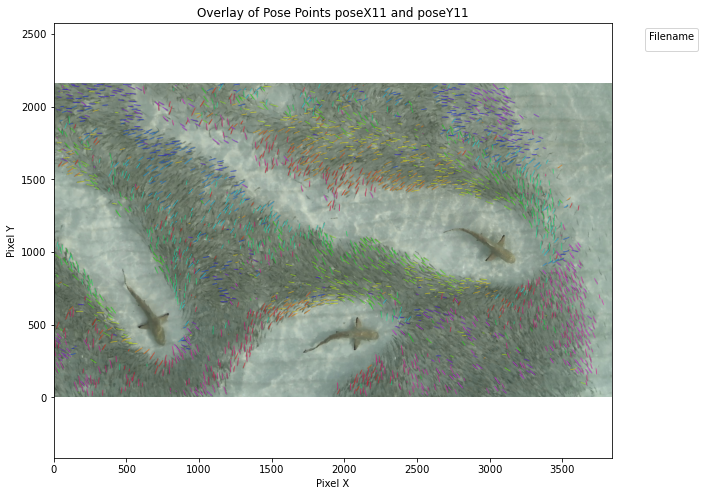

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


12


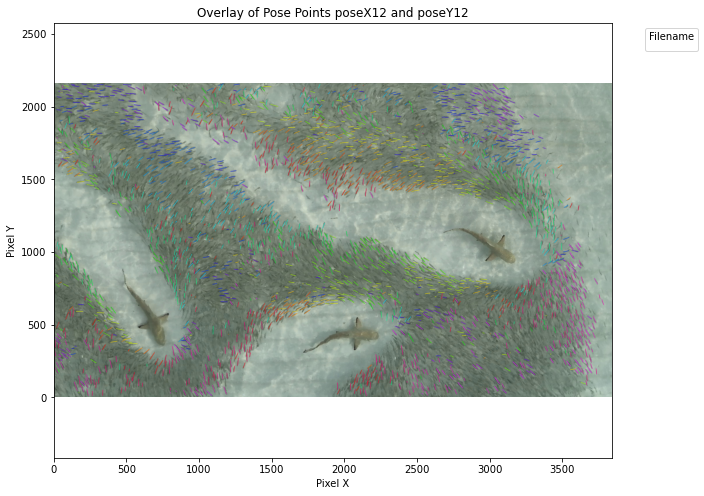

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


13


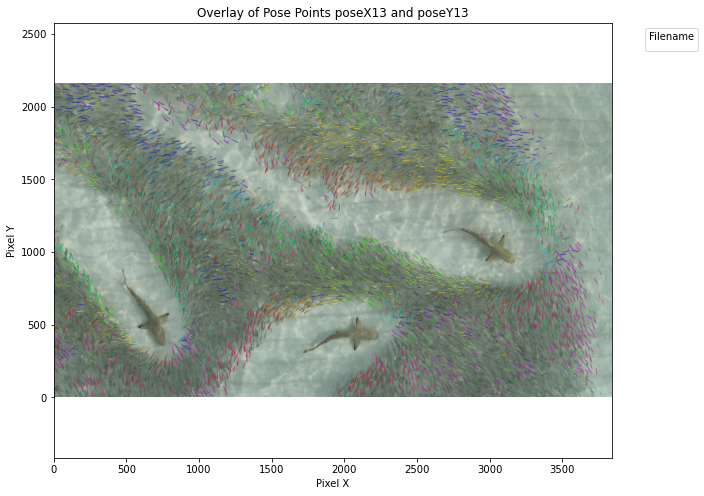

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


14


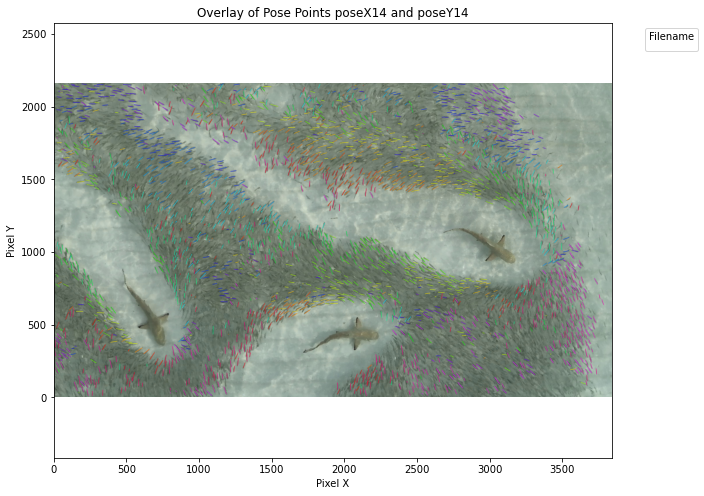

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


15


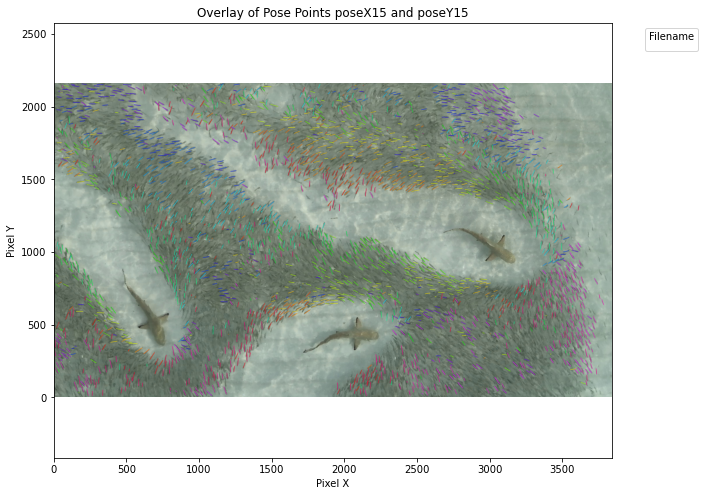

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


16


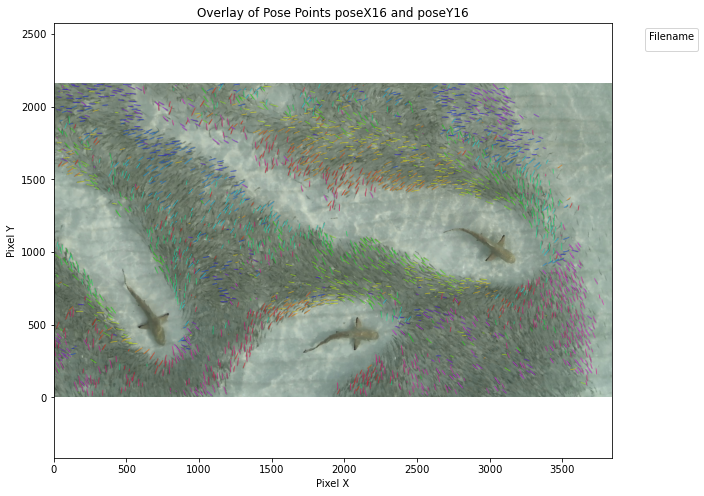

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image file
image_path = '/Users/apaula/Downloads/frame_1794.jpg'

# Load the image
img = mpimg.imread(image_path)

# Function to plot each pair of pose points
def plot_pose_pairs(frame_1794_data, pose_index):
    plt.figure(figsize=(10, 8))
    plt.imshow(img)  # Display the image as the background
    plt.title(f'Overlay of Pose Points poseX{pose_index} and poseY{pose_index}')
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    
    # Prepare a color cycle, using matplotlib's default prop cycle
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    # Plotting each file's poseX[i] and poseY[i]
    for idx, (filename, data) in enumerate(frame_1794_data.items()):
        if f'poseX{pose_index}' in data and f'poseY{pose_index}' in data:
            x_values = data[f'poseX{pose_index}']
            y_values = data[f'poseY{pose_index}']
            if not np.isinf(x_values).all() and not np.isinf(y_values).all():  # Check if values are finite
                plt.scatter(x_values, y_values, color=color_cycle[idx % len(color_cycle)], label=filename)

    plt.gca().invert_yaxis()  # Ensure the y-axis starts from the top
    plt.axis('equal')  # Set equal scaling by changing aspect ratio of the plot
    plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(False)  # Turn off the grid on the image
    plt.show()

# Iterate over the number of pose pairs you expect to have
number_of_pose_pairs = 17  # Adjust this number based on your dataset
for i in range(number_of_pose_pairs):
    print(i)
    plot_pose_pairs(frame_1794_data, i)


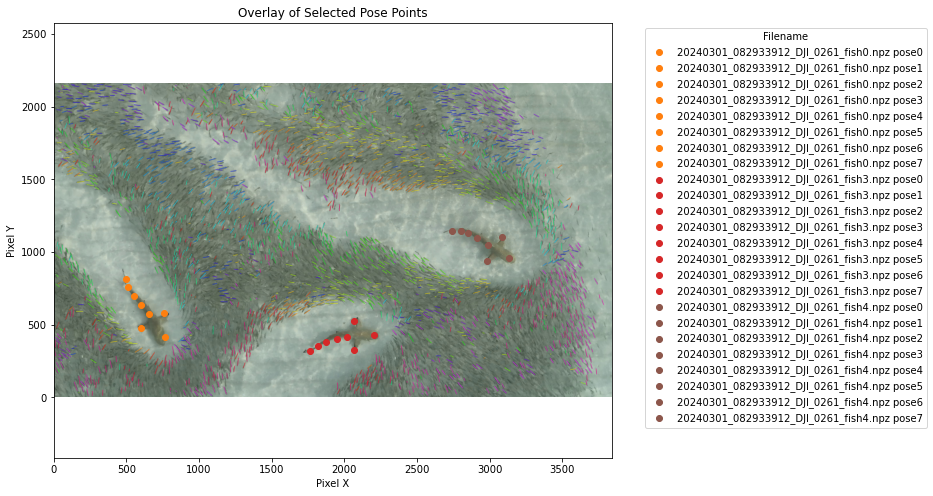

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image file
image_path = '/Users/apaula/Downloads/frame_1794.jpg'

# Load the image
img = mpimg.imread(image_path)

# Function to plot selected pose pairs
def plot_selected_pose_pairs(frame_1794_data, pose_indices):
    plt.figure(figsize=(10, 8))
    plt.imshow(img)  # Display the image as the background
    plt.title('Overlay of Selected Pose Points')
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    
    # Prepare a color cycle, using matplotlib's default prop cycle
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    # Plotting each file's selected pose points
    for idx, (filename, data) in enumerate(frame_1794_data.items()):
        for pose_index in pose_indices:
            x_key = f'poseX{pose_index}'
            y_key = f'poseY{pose_index}'
            if x_key in data and y_key in data:
                x_values = data[x_key]
                y_values = data[y_key]
                if not np.isinf(x_values).all() and not np.isinf(y_values).all():  # Check if values are finite
                    plt.scatter(x_values, y_values, color=color_cycle[idx % len(color_cycle)], label=f'{filename} pose{pose_index}')

    plt.gca().invert_yaxis()  # Ensure the y-axis starts from the top
    plt.axis('equal')  # Set equal scaling by changing aspect ratio of the plot
    plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(False)  # Turn off the grid on the image
    plt.show()

# Specify the indices of pose points that make sense
valid_pose_indices = list(range(8))  # From pose0 to pose7

# Plot only the selected pose pairs
plot_selected_pose_pairs(frame_1794_data, valid_pose_indices)


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image file
image_path = '/Users/apaula/Downloads/frame_1794.jpg'

# Load the image
img = mpimg.imread(image_path)

# Function to plot selected pose pairs on the image
def plot_pose_on_image(frame_1794_data, pose_indices, output_path):
    # Calculate the appropriate DPI to match the image resolution exactly
    figsize = 10, 10 * (img.shape[0] / img.shape[1])  # Keeping aspect ratio
    dpi = img.shape[1] / figsize[0]  # DPI based on image width and figure width

    # Create a figure with the specified aspect ratio and DPI
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Turn off axes
    ax.set_axis_off()  # Ensure no axis is displayed
    ax.margins(0)  # Remove default margins (if any)
    ax.set_xticks([])  # Remove x ticks
    ax.set_yticks([])  # Remove y ticks
    
    # Plotting selected pose points
    for idx, (filename, data) in enumerate(frame_1794_data.items()):
        for pose_index in pose_indices:
            x_key = f'poseX{pose_index}'
            y_key = f'poseY{pose_index}'
            if x_key in data and y_key in data:
                x_values = data[x_key]
                y_values = data[y_key]
                if not np.isinf(x_values).all() and not np.isinf(y_values).all():  # Check if values are finite
                    ax.scatter(x_values, y_values, color='white', s=9)  # Use yellow color and smaller dot size

    fig.tight_layout(pad=0)  # Remove any padding around the plot
    plt.savefig(output_path, dpi=dpi, bbox_inches='tight', pad_inches=0)  # Save the figure without padding
    plt.close(fig)  # Close the plot to free up memory

# Specify the indices of pose points that make sense
valid_pose_indices = list(range(8))  # From pose0 to pose7

# Specify output path for the saved image
output_image_path = '/Users/apaula/Downloads/frame_1794_overlay.jpg'

# Generate the image
plot_pose_on_image(frame_1794_data, valid_pose_indices, output_image_path)


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Path to the image file
image_path = '/Users/apaula/Downloads/frame_1794.jpg'

# Load the image
img = mpimg.imread(image_path)

# Function to plot selected data points on the image
def plot_data_on_image(frame_data, selected_fish, output_path, frame_range):
    # Calculate the appropriate DPI to match the image resolution exactly
    figsize = 10, 10 * (img.shape[0] / img.shape[1])  # Keeping aspect ratio
    dpi = img.shape[1] / figsize[0]  # DPI based on image width and figure width

    # Create a figure with the specified aspect ratio and DPI
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Turn off axes

    # Prepare a color for plotting
    plot_color = '#E6E200'  # Sand-like, darker yellow

    # Process each selected fish data
    for fish_num in selected_fish:
        filename = f"20240301_082933912_DJI_0261_fish{fish_num}.npz"
        data = frame_data.get(filename, None)
        if data:
            # Extract frame numbers to find indices within the specified range
            frame_indices = np.where((data['frame'] >= frame_range[0]) & (data['frame'] <= frame_range[1]))[0]
            if frame_indices.size > 0:
                x_values = data['X#wcentroid'][frame_indices]
                y_values = data['Y#wcentroid'][frame_indices]
                # Plot the data points
                ax.scatter(x_values, y_values, color=plot_color, s=7)  # Adjust the color and size as needed

    plt.savefig(output_path, dpi=dpi, bbox_inches='tight', pad_inches=0)  # Save the figure without padding
    plt.close(fig)  # Close the plot to free up memory

# Specify the selected fish and frame range
selected_fish = [8, 7, 4]
frame_range = (1744, 1794)

# Specify output path for the saved image
output_image_path = '/Users/apaula/Downloads/frame_1794_centroid_overlay.jpg'

# Load your frame data here, for example:
frame_data = npz_files_data  # This should be replaced with actual loading code

# Generate the image (Make sure to load your actual data where commented)
plot_data_on_image(frame_data, selected_fish, output_image_path, frame_range)


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Path to the image file
image_path = '/Users/apaula/Downloads/frame_1794_overlay.jpg'

# Load the image
img = mpimg.imread(image_path)

# Function to plot selected data points on the image
def plot_data_on_image(frame_data, selected_fish, output_path, frame_range):
    # Calculate the appropriate DPI to match the image resolution exactly
    figsize = 10, 10 * (img.shape[0] / img.shape[1])  # Keeping aspect ratio
    dpi = img.shape[1] / figsize[0]  # DPI based on image width and figure width

    # Create a figure with the specified aspect ratio and DPI
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Turn off axes

    # Prepare a color for plotting
    plot_color = 'red'  # Sand-like, darker yellow

    # Process each selected fish data
    for fish_num in selected_fish:
        filename = f"20240301_082933912_DJI_0261_fish{fish_num}.npz"
        data = frame_data.get(filename, None)
        if data:
            # Extract frame numbers to find indices within the specified range
            frame_indices = np.where((data['frame'] >= frame_range[0]) & (data['frame'] <= frame_range[1]))[0]
            if frame_indices.size > 0:
                x_values = data['X#wcentroid'][frame_indices]
                y_values = data['Y#wcentroid'][frame_indices]
                # Plot the data points
                ax.scatter(x_values, y_values, color=plot_color, s=7)  # Adjust the color and size as needed

    plt.savefig(output_path, dpi=dpi, bbox_inches='tight', pad_inches=0)  # Save the figure without padding
    plt.close(fig)  # Close the plot to free up memory

# Specify the selected fish and frame range
selected_fish = [8, 7, 4]
frame_range = (1744, 1794)

# Specify output path for the saved image
output_image_path = '/Users/apaula/Downloads/frame_1794_combined_overlay.jpg'

# Load your frame data here, for example:
frame_data = npz_files_data  # This should be replaced with actual loading code

# Generate the image (Make sure to load your actual data where commented)
plot_data_on_image(frame_data, selected_fish, output_image_path, frame_range)


In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def plot_pose_on_image(frame_1794_data, pose_indices, output_path):
    img_path = '/Users/apaula/Downloads/frame_1794.jpg'
    img = mpimg.imread(img_path)
    figsize = 10, 10 * (img.shape[0] / img.shape[1])
    dpi = img.shape[1] / figsize[0]

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.imshow(img)
    ax.axis('off')

    print("Starting to process data...")  # Check that function is called
    if not frame_1794_data:
        print("Data dictionary is empty.")  # Check if data is empty
        return

    pose_pairs = [(0, 2), (2, 4), (4, 5), (5, 6), (6, 7), (7, 8)]
    for filename, data in frame_1794_data.items():
        print(f"Processing {filename}...")  # Confirm each file is processed
        all_x_values = []
        all_y_values = []
        for pose_index in pose_indices:
            x_key = f'poseX{pose_index}'
            y_key = f'poseY{pose_index}'
            if x_key in data and y_key in data:
                x_values = data[x_key]
                y_values = data[y_key]
                if np.any(np.isfinite(x_values)) and np.any(np.isfinite(y_values)):
                    ax.scatter(x_values, y_values, color='white', s=9)
                    all_x_values.append(x_values)
                    all_y_values.append(y_values)
                else:
                    print(f"Skipping keypoint {pose_index} due to non-finite values")

        for start, end in pose_pairs:
            if len(all_x_values) > start and len(all_x_values) > end:
                x_values = [all_x_values[start], all_x_values[end]]
                y_values = [all_y_values[start], all_y_values[end]]
                ax.plot(x_values, y_values, color='white', linewidth = 0.5)
            else:
                print(f"Skipping connection from {start} to {end} due to missing data")

    plt.savefig(output_path, dpi=dpi, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

# Ensure data is correctly formatted and loaded
output_image_path = '/Users/apaula/Downloads/frame_1794_overlay.jpg'
valid_pose_indices = list(range(9))  # Ensure you have 9 keypoints (0 to 8)

# Dictionary to hold data for frame 1794 from all files
frame_1794_data = {}

# Loop through each file's data in the npz_files_data dictionary
for filename, data in npz_files_data.items():
    # Check if 'frame' key exists in the data dictionary
    if 'frame' in data:
        # Find the indices where frame number is 1794
        frame_indices = np.where(data['frame'] == 1794)[0]
        # Check if there are any entries for frame 1794
        if frame_indices.size > 0:
            # Retrieve and store all data for these indices, ensuring indices do not exceed array length
            frame_1794_data[filename] = {}
            for key in data:
                if len(data[key]) > frame_indices.max():  # Ensure the maximum index is within the array length
                    frame_1794_data[filename][key] = data[key][frame_indices]
                else:
                    frame_1794_data[filename][key] = 'Index out of bounds'

# frame_1794_data now contains all entries for frame 1794 from each npz file that includes this frame


plot_pose_on_image(frame_1794_data, valid_pose_indices, output_image_path)


Starting to process data...
Processing 20240301_082933912_DJI_0261_fish1.npz...
Skipping keypoint 0 due to non-finite values
Skipping keypoint 1 due to non-finite values
Skipping keypoint 2 due to non-finite values
Skipping keypoint 3 due to non-finite values
Skipping keypoint 4 due to non-finite values
Skipping keypoint 5 due to non-finite values
Skipping keypoint 6 due to non-finite values
Skipping keypoint 7 due to non-finite values
Skipping keypoint 8 due to non-finite values
Skipping connection from 0 to 2 due to missing data
Skipping connection from 2 to 4 due to missing data
Skipping connection from 4 to 5 due to missing data
Skipping connection from 5 to 6 due to missing data
Skipping connection from 6 to 7 due to missing data
Skipping connection from 7 to 8 due to missing data
Processing 20240301_082933912_DJI_0261_fish0.npz...
Processing 20240301_082933912_DJI_0261_fish2.npz...
Skipping keypoint 0 due to non-finite values
Skipping keypoint 1 due to non-finite values
Skipping 

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image file
image_path = '/Users/apaula/Downloads/frame_1794.jpg'

# Load the image
img = mpimg.imread(image_path)

# Function to plot selected pose pairs on the image
def plot_pose_on_image(frame_1794_data, pose_indices, output_path):
    # Calculate the appropriate DPI to match the image resolution exactly
    figsize = 10, 10 * (img.shape[0] / img.shape[1])  # Keeping aspect ratio
    dpi = img.shape[1] / figsize[0]  # DPI based on image width and figure width

    # Create a figure with the specified aspect ratio and DPI
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Turn off axes
    ax.set_axis_off()  # Ensure no axis is displayed
    ax.margins(0)  # Remove default margins (if any)
    ax.set_xticks([])  # Remove x ticks
    ax.set_yticks([])  # Remove y ticks
    
    # Plotting selected pose points
    for idx, (filename, data) in enumerate(frame_1794_data.items()):
        for pose_index in pose_indices:
            x_key = f'poseX{pose_index}'
            y_key = f'poseY{pose_index}'
            if x_key in data and y_key in data:
                x_values = data[x_key]
                y_values = data[y_key]
                if not np.isinf(x_values).all() and not np.isinf(y_values).all():  # Check if values are finite
                    ax.scatter(x_values, y_values, color='white', s=9)  # Use yellow color and smaller dot size

    fig.tight_layout(pad=0)  # Remove any padding around the plot
    plt.savefig(output_path, dpi=dpi, bbox_inches='tight', pad_inches=0)  # Save the figure without padding
    plt.close(fig)  # Close the plot to free up memory

# Specify the indices of pose points that make sense
valid_pose_indices = list(range(9))  # From pose0 to pose7

# Specify output path for the saved image
output_image_path = '/Users/apaula/Downloads/frame_1794_overlay.jpg'

# Generate the image
plot_pose_on_image(frame_1794_data, valid_pose_indices, output_image_path)
